In [4]:
!pip install ortools
!pip install matplotlib

     |████████████████████████████████| 11.2 MB 4.8 MB/s            
     |████████████████████████████████| 4.3 MB 40.1 MB/s            
     |████████████████████████████████| 895 kB 50.1 MB/s            
     |████████████████████████████████| 1.1 MB 48.3 MB/s            


Number of variables = 2
Number of constraints = 2
Solution:
Objective value = 23.0
x = 3.0
y = 2.0


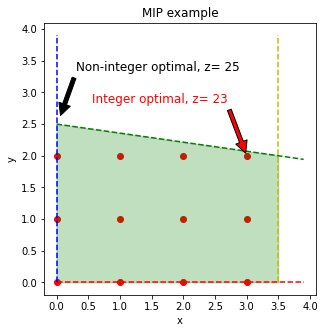

In [5]:
# Maximize x + 10y subject to the following constraints:
# x + 7 y ≤ 17.5
# x ≤ 3.5
# x ≥ 0
# y ≥ 0
#x, y integers


from ortools.linear_solver import pywraplp
# Declare the MIP solver

# Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver('SCIP')

#Define the variables
infinity = solver.infinity()

# x and y are integer non-negative variables.
x = solver.IntVar(0.0, infinity, 'x')
y = solver.IntVar(0.0, infinity, 'y')

print('Number of variables =', solver.NumVariables())

# Define the constraints
# x + 7 * y <= 17.5.
solver.Add(x + 7 * y <= 17.5)

# x <= 3.5.
solver.Add(x <= 3.5)

print('Number of constraints =', solver.NumConstraints())

# Define the objective

# Maximize x + 10 * y.
solver.Maximize(x + 10 * y)

# Call the solver
status = solver.Solve()

# Display the solution

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

# Graphical analysis

import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(5, 5))

ax.set_aspect("equal")

xn = np.arange(0., 4., 0.1)

# REGION LIMITS
plt.plot(xn, 0*xn, 'r--', 0*xn, xn, 'b--', xn,17.5/7.0 - xn/7.0, 'g--', 3.5*np.ones(xn.size),xn, 'y--')

# INTEGER POINTS
dotsX = np.linspace(0, 3, 4)
dotsY = np.linspace(0, 2, 3)
X, Y = np.meshgrid(dotsX, dotsY)
ax.scatter(X, Y, c='r')


ax.annotate('Non-integer optimal, z= 25', (0.05, 2.6),
            xytext=(0.3, 3.5), 
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12,
            horizontalalignment='left', verticalalignment='top')


ax.annotate('Integer optimal, z= 23', (3.0, 2.0),
            xytext=(2.7, 3.0), 
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=12,color='red',
            horizontalalignment='right', verticalalignment='top')

x1 = np.arange(0., 3.6, 0.1)
y1 = np.zeros(x1.size)
y2 = 17.5/7.0 - x1/7.0
ax.fill_between(x1,y1,y2,color='green', alpha=0.25)


ax.set_title('MIP example')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
